In [4]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mebocost import mebocost
#conda install ipywidgets

## MEBOCOST for predicting metabolite-based cell-cell communications
<p> In this tutorial, we apply MEBOCOST .
    </p>

## 1. Create mebocost object
<p> Users can pass data either by adata scanpy object (1.1 reccomended), or by python pandas data frame (1.2)</p>

### 1.1 get expression and cell annotation data from scanpy object

In [3]:
adata = sc.read_h5ad('rasv_subclustered.h5ad')
## check adata (cells, genes)
print(adata.shape)
### make sure your adata cover all genes and all cells
### if not, you may want to load all genes saved in raw by doing:
# adata = adata.raw.copy()
adata.obs['label'] = adata.obs['cell_type'] + '~' + adata.obs['condition']

adata.obs['cell_type'] = adata.obs['cell_type'].str.replace('/', '_', regex=False)
adata.obs.cell_type.unique()

(73268, 24461)


array(['EC', 'B', 'T', 'Mono', 'HEP1_C', 'Fib', 'DCs', 'HEP2_CC', 'pDCs',
       'MDMs', 'NK_T', 'Mph', 'KCs', 'Gran', 'plasm_?'], dtype=object)

##### create mebocost object

In [5]:
## initiate the mebocost object
### import expression data by scanpy adata object
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['cell_type'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='mouse',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


[June 20, 2024 00:38:08]: We get expression data with 24461 genes and 73268 cells.
[June 20, 2024 00:38:08]: Data Preparation Done in 0.1720 seconds


### 1.2 get expression and cell annotation from external files (skip if you have done 1.1)
<p>Users can provide exp_mat (scRNA-seq gene-by-cell expression matrix) and cell_ann (cell-by-annoatation matrix) from external files, such as .csv, .tsv, and .txt files, to MEBOCOST for mCCC analysis. Please refer to pandas read_csv functions to read those files (<a href=https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html>read_csv</a>) into Python. In the case that users want to use expression data and meta data from Seurat in R. It is strongly recommended first writing out expression matrix and meta data (cell annotation) from Seurat in R. Once the expression and meta data were saved in your local, those files can be read into Python by pandas and then pass to mebocost as the instructions in following. Please make sure you have total genes in the table, rather than only highly variable genes.</p>


In [14]:
### pass expression data and cell annotation table by pandas data frame
### taking exp_mat and cell_all from the above 
### read expression data from a external file
exp_mat = pd.read_csv(your_exp_data_file)
cell_ann = pd.read_csv(your_cell_ann_data_file)

mebo_obj = mebocost.create_obj(
                        adata = None,
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=exp_mat,
                        cell_ann=cell_ann,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


NameError: name 'your_exp_data_file' is not defined

#### 2.1 Aggregating metabolite enzyme expression [Optional]
<li> Note: this estimation have been already incoperated in mebo_obj.infer_commu, so only run this step separately if you just want to aggregate enzyme expression for metabolites and stop from doing further analysis.</li>

In [5]:
## 【optional】only aggregate metabolite enzyme expression for cells 
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
#mebo_obj._load_config_()
#mebo_obj.estimator()


[June 19, 2024 19:16:34]: Load config and read data based on given species [mouse].
[June 19, 2024 19:16:34]: Aggregate metabolite enzymes using mebocost


KeyboardInterrupt: 

In [ ]:
## check the aggregated enzyme expression for metabolites
#met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      #index = mebo_obj.met_mat_indexer,
                      #columns = mebo_obj.met_mat_columns)
## print head
#met_mat.head()


#### 2.2 communication inference

In [4]:
## metabolic communication inference, this step takes a while
commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 5,
                                pval_method='permutation_test_fdr',
                                pval_cutoff=0.05
                            )


[June 19, 2024 19:37:51]: Load config and read data based on given species [mouse].
[June 19, 2024 19:37:53]: Aggregate metabolite enzymes using mebocost
[June 19, 2024 19:38:13]: Infer communications
[June 19, 2024 19:38:13]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[June 19, 2024 19:38:13]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[June 19, 2024 19:39:25]: met_sensor: (323, 8)
[June 19, 2024 19:39:25]: avg_exp: (2145, 15) for (gene, cell) of needed
[June 19, 2024 19:39:25]: avg_met: (586, 15) for (metabolite, cell) of needed
[June 19, 2024 19:39:25]: shuffling 1000 times for generating backgroud
[June 19, 2024 19:40:32]: take exp and met avg for shuffling
[June 19, 2024 19:42:09]: thread: 8
[June 19, 2024 19:42:12]: Abca1 ~ HMDB0006247
[June 19, 2024 19:42:12]: Normalizing Cluster Mean and Calculating Communication Score
[June 19, 2024 19:42:13]: Calculating P-value
[June 19, 2024 19:42:13]: Slc11a2 ~ HMDB0015531
[June 19, 2024 19:42:

In [6]:
print('Number of mCCC detected by enzyme and sensor co-expression: ', commu_res.shape[0])


Number of mCCC detected by enzyme and sensor co-expression:  1311


#### 2.3 save mebocost object and reload object
#### MEBOCOST object can be saved as a pickle file which is a python-based file format using less disk space
##### save

In [7]:
# ### save 
mebocost.save_obj(obj = mebo_obj, path = 'rasV_mebo.pk')


##### reload

In [6]:
## re-load the previous object if needed
mebo_obj = mebocost.load_obj('rasV_mebo.pk')


[June 20, 2024 00:38:23]: Data Preparation Done in 0.1384 seconds


In [7]:
## check cutoff
print('sensor_exp cutoff: %s'%mebo_obj.cutoff_exp)
print('metabolite_agg_enzyme cutoff: %s'%mebo_obj.cutoff_met)


sensor_exp cutoff: 1.0
metabolite_agg_enzyme cutoff: 0.2


#### 2.4 Integrate COMPASS to constrain mCCC analysis by efflux and influx rates
<p>This can be done by running COMPASS, a tool for compute flux rates, using single-cell data. Please install the COMPASS following the instructions at https://yoseflab.github.io/Compass/install.html</p>


In [8]:
### Running COMPASS for each cell type by the average gene expression
### output average gene expression
avg_exp = sc.get.aggregate(adata, by = 'cell_type', func='mean')
avg_exp = pd.DataFrame(avg_exp.layers['mean'], index = avg_exp.obs_names, columns = avg_exp.var_names).T
# ## do un log since COMPASS will take log in the algorithm
avg_exp = avg_exp.apply(lambda col: np.exp(col)-1)
avg_exp.to_csv('avg_exp_mat.tsv', sep = '\t')


## steps for downloading compass (linux env python 3.8)
follow instructions here: https://yoseflab.github.io/Compass/install.html#requirements 
both compass and cplex need to be installed with the same python version (22.1 cplex support 3.8,3.9.3.10)
If you have an issue during the setup.py access run:
whereis python
Assume the result is "/usr/bin/python", then:
sudo /usr/bin/python setup.py install

downgrade pandas to 1.5.3

then make this bash script and run the avg exp mat.tsv file:::: $sh comppas.sh

<p>Running the COMPASS using avg_exp_mat.tsv, and get secretion.tsv and uptake.tsv results</p>
<p>Example command line in bash:</p>

```shell
exptsv_path=your_folder/avg_exp_mat.tsv
species=homo_sapiens
output_path=your_folder/compass_res
temp_path=your_folder/compass_res_tmp
core=8
compass=/root/miniconda3/bin/compass

echo '++++ run compass'
## since it is cell type level analysis, so lambda set to 0
$compass --data $exptsv_path --num-thread $core --species $species --output-dir $output_path --temp-dir $temp_path --calc-metabolites --lambda 0
echo 'Finished'
```

#### Update the commu_res in the mebocost object based on secretion.tsv and uptake.tsv


In [17]:
## apply constraint on compass flux result
updated_res = mebo_obj._ConstainFlux_(compass_folder='compass_res/',
                                    efflux_cut='auto',
                                    influx_cut='auto',
                                    inplace=False)



efflux_cut: 71.4131549246466
influx_cut: 2.2300991665905436


In [19]:
## update to the object
mebo_obj.commu_res = updated_res
print('Number of mCCC detected by further flux contrains', updated_res.shape[0])
mebocost.save_obj(obj = mebo_obj, path = 'rasV_mebo.pk')

Number of mCCC detected by further flux contrains 963


In [ ]:
## load and continue plotting
mebo_obj = mebocost.load_obj('rasV_mebo.pk')

#### [Optinal] 2.6 Examing whether the mCCC were confounded by highly abundant metabolites in the blood.

<p>We have tested the correlation between mCCC scores and blood metabolite concentrations across multiple samples. Generally, we did <b>NOT</b> observe a very strong confounding from blood metabolites to MEBOCOST mCCC scores. Nevertheless, we provide users with a function to examine such a confounding in their own data and offer correction by fitting a linear regression model between mCCC score and metabolite level in blood. The corrected mCCC score will be calculated by subtracting the predicted values from the original mCCC score in the regression model. To do this, simply run the following function. The met_cont_file is a required data, which should be a table with two columns corresponding to metabolite name and concentration, formatted as tab-delimited and without a header.</p>


In [11]:
#corrected_commu_res = mebo_obj._blood_correct_test_(met_cont_file='data/mebocost_db/common/hmdb_blood_metabolite_concentration.tsv',
                                #commu_score_col='Commu_Score',
                                #title='',
                                #show_plot=False,
                                #pdf=False)
## the Corrected_Commu_Score column is the corrected mCCC score. Update the commu_score table to the object, if the confounding is strong.
#mebo_obj.commu_res = corrected_commu_res.copy()


### 2.7 Now explore the mCCC result by Interactive Visualization Fuction
<p>To provide a user-friendly visualization of mebocost result, especially for those datasets with large number of communication events, notebook interactive view shed lights in. We developed the Jupyter interactive widgets to mimic webpage.
NOTE: this function can only be used in Jupyter notebook</p> 

In [12]:
## here, users can click and plot figures

## interactive view module mimic a website but all go with our default parameters
mebo_obj.communication_in_notebook(pval_method='permutation_test_fdr',
                                    pval_cutoff=0.05,
                                    comm_score_col='Commu_Score',
                                    comm_score_cutoff=None,
                                    cutoff_prop=None)


<b>Select and Click button to visulize</b>

### 2.8 You can also visualize mCCC result by generating figure manually

#### summary of the number of communication events

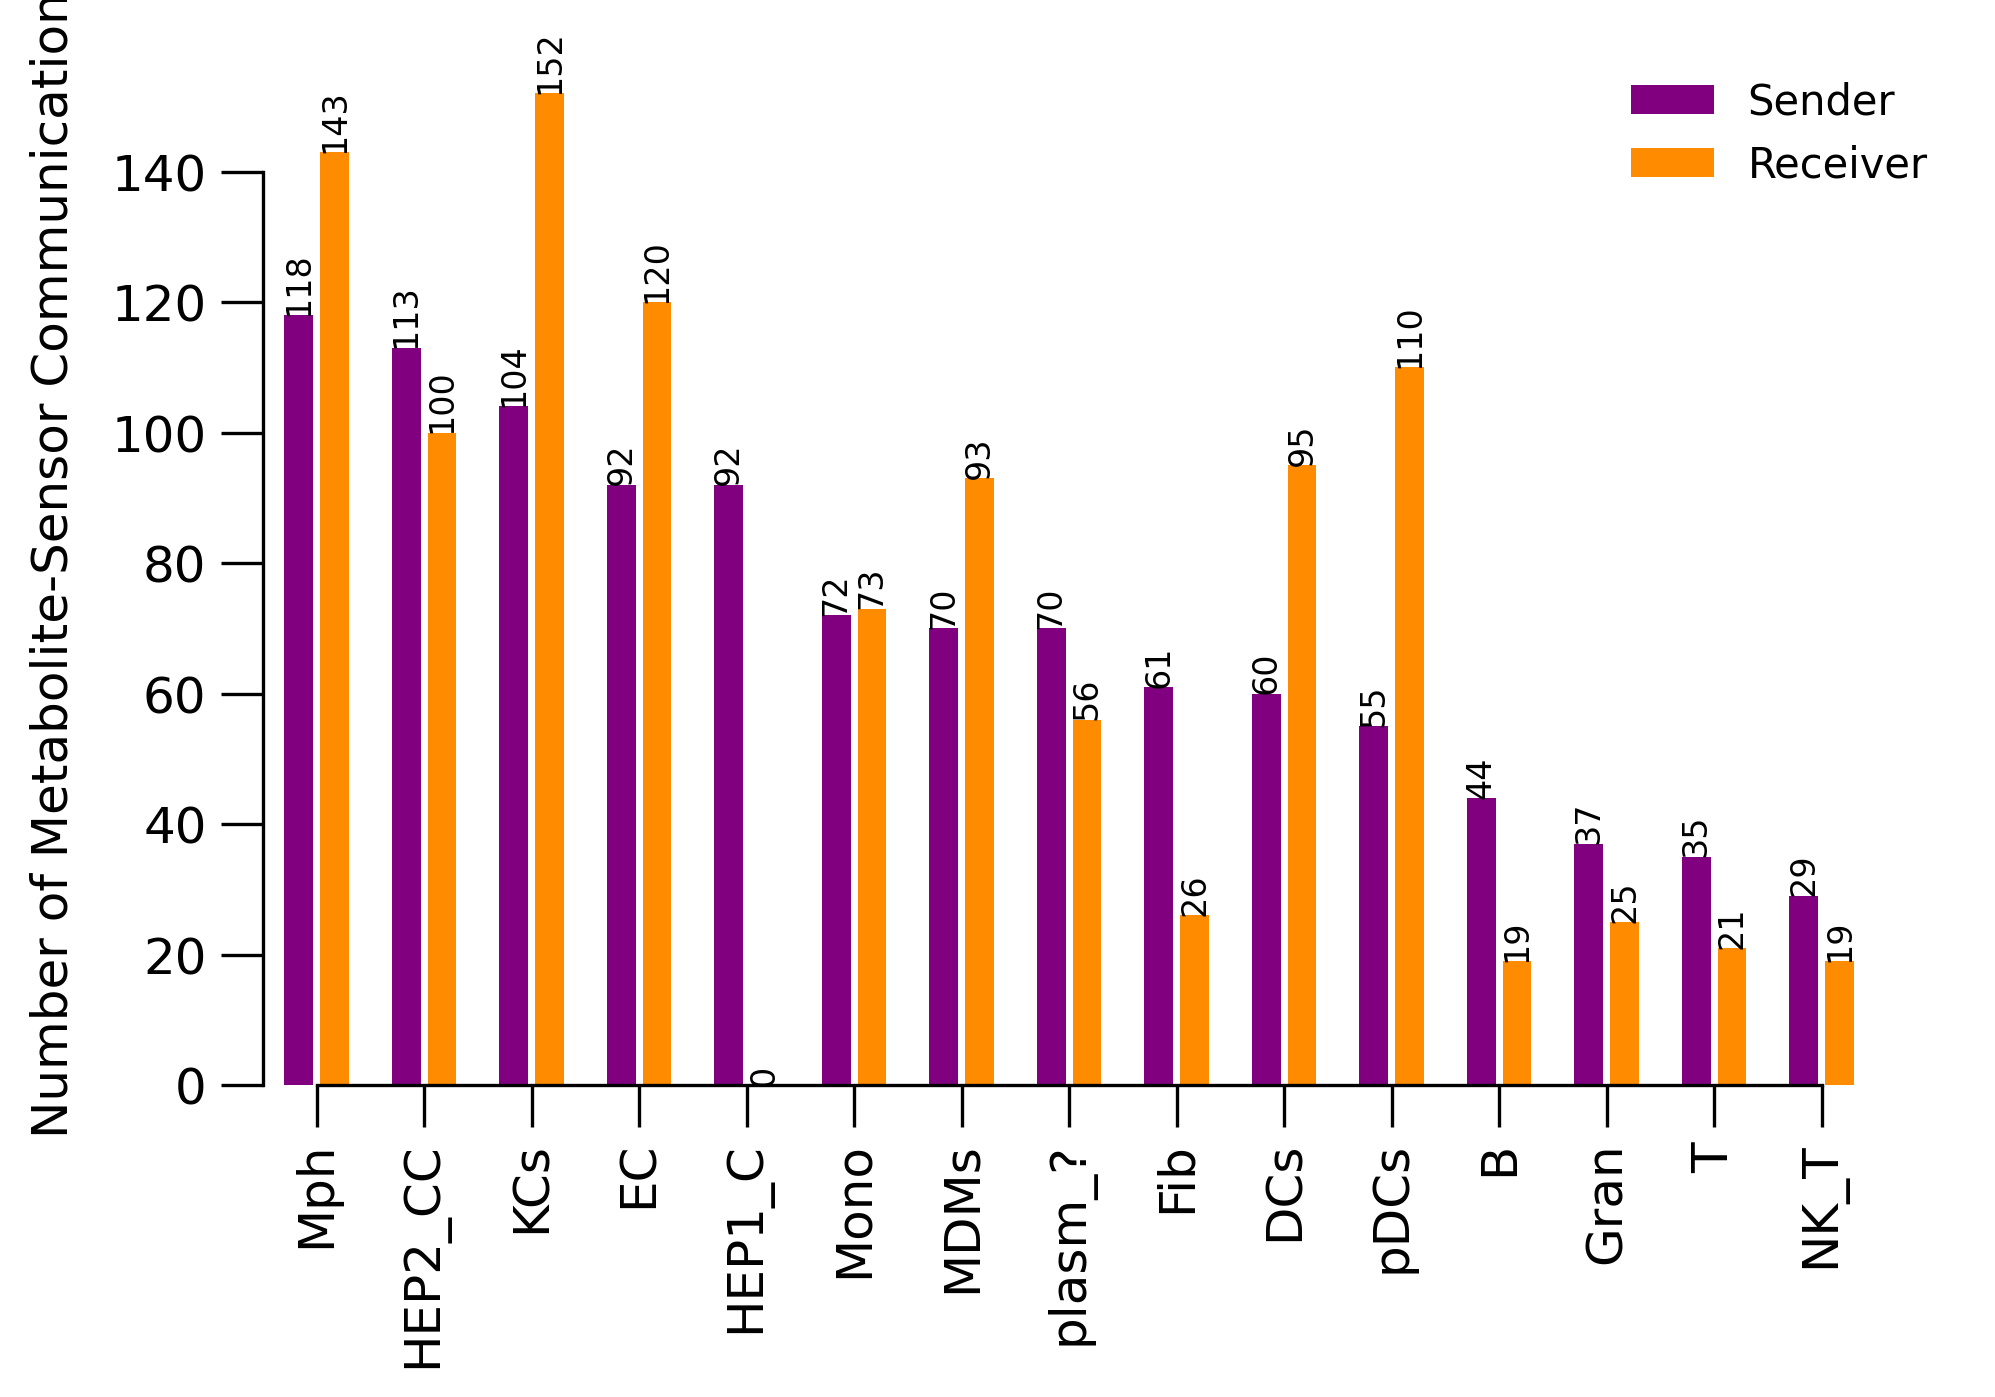

In [27]:
## sender and receiver event number
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    xorder=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=True,
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )

#### summay of communication in cell-to-cell network

[June 19, 2024 20:31:48]: show communication in cells by network plot


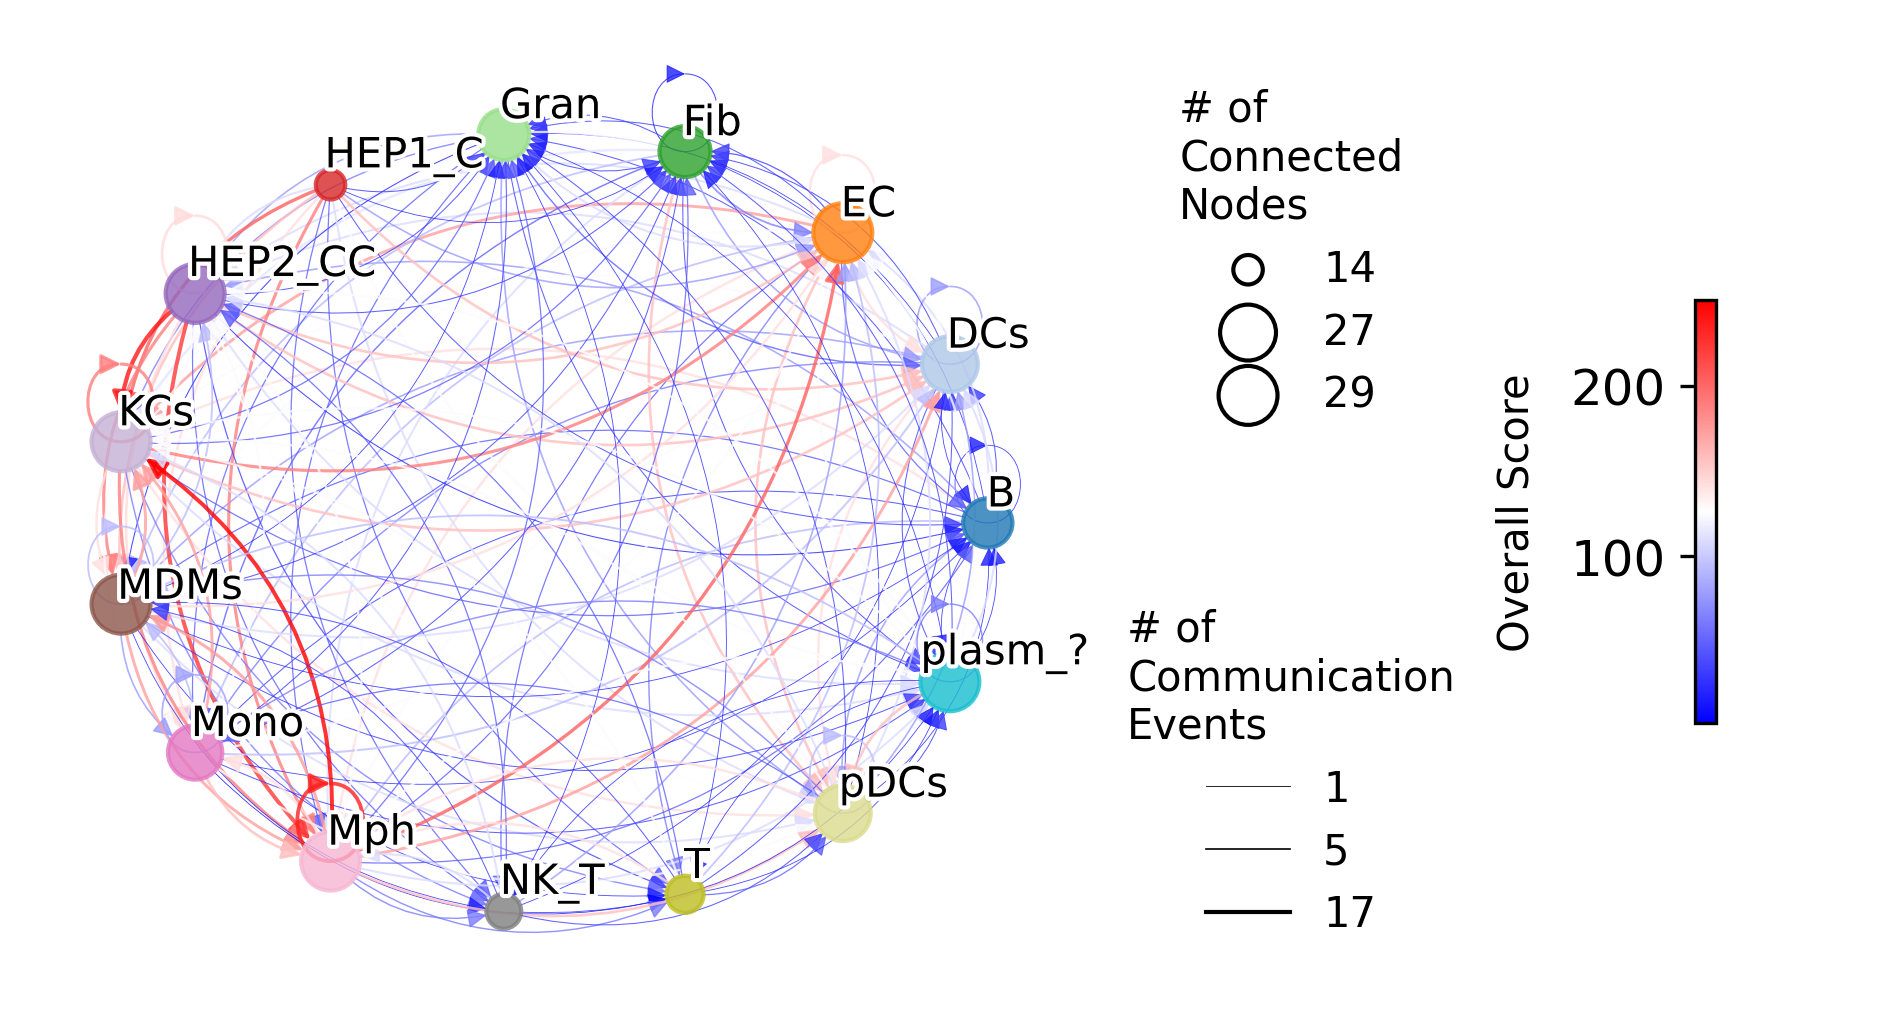

In [71]:
## circle plot to show communications between cell groups
fig = mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize='auto',
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    linewidth_value_range = None,
                    node_size_norm=(50, 200),
                    node_value_range = None,
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save=None,
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0,
                    text_outline=True,
                    return_fig=True
                )

### the "overall score" represent the sum of -log10(FDR) of detected metabolite-sensor communications between a pair of cell types

fig.savefig('mebocost_circplot_rasv.png')

#### Showing the communication between sender and receiver in a dot plot

[June 19, 2024 20:33:25]: plot dot plot to show communication in cell type level


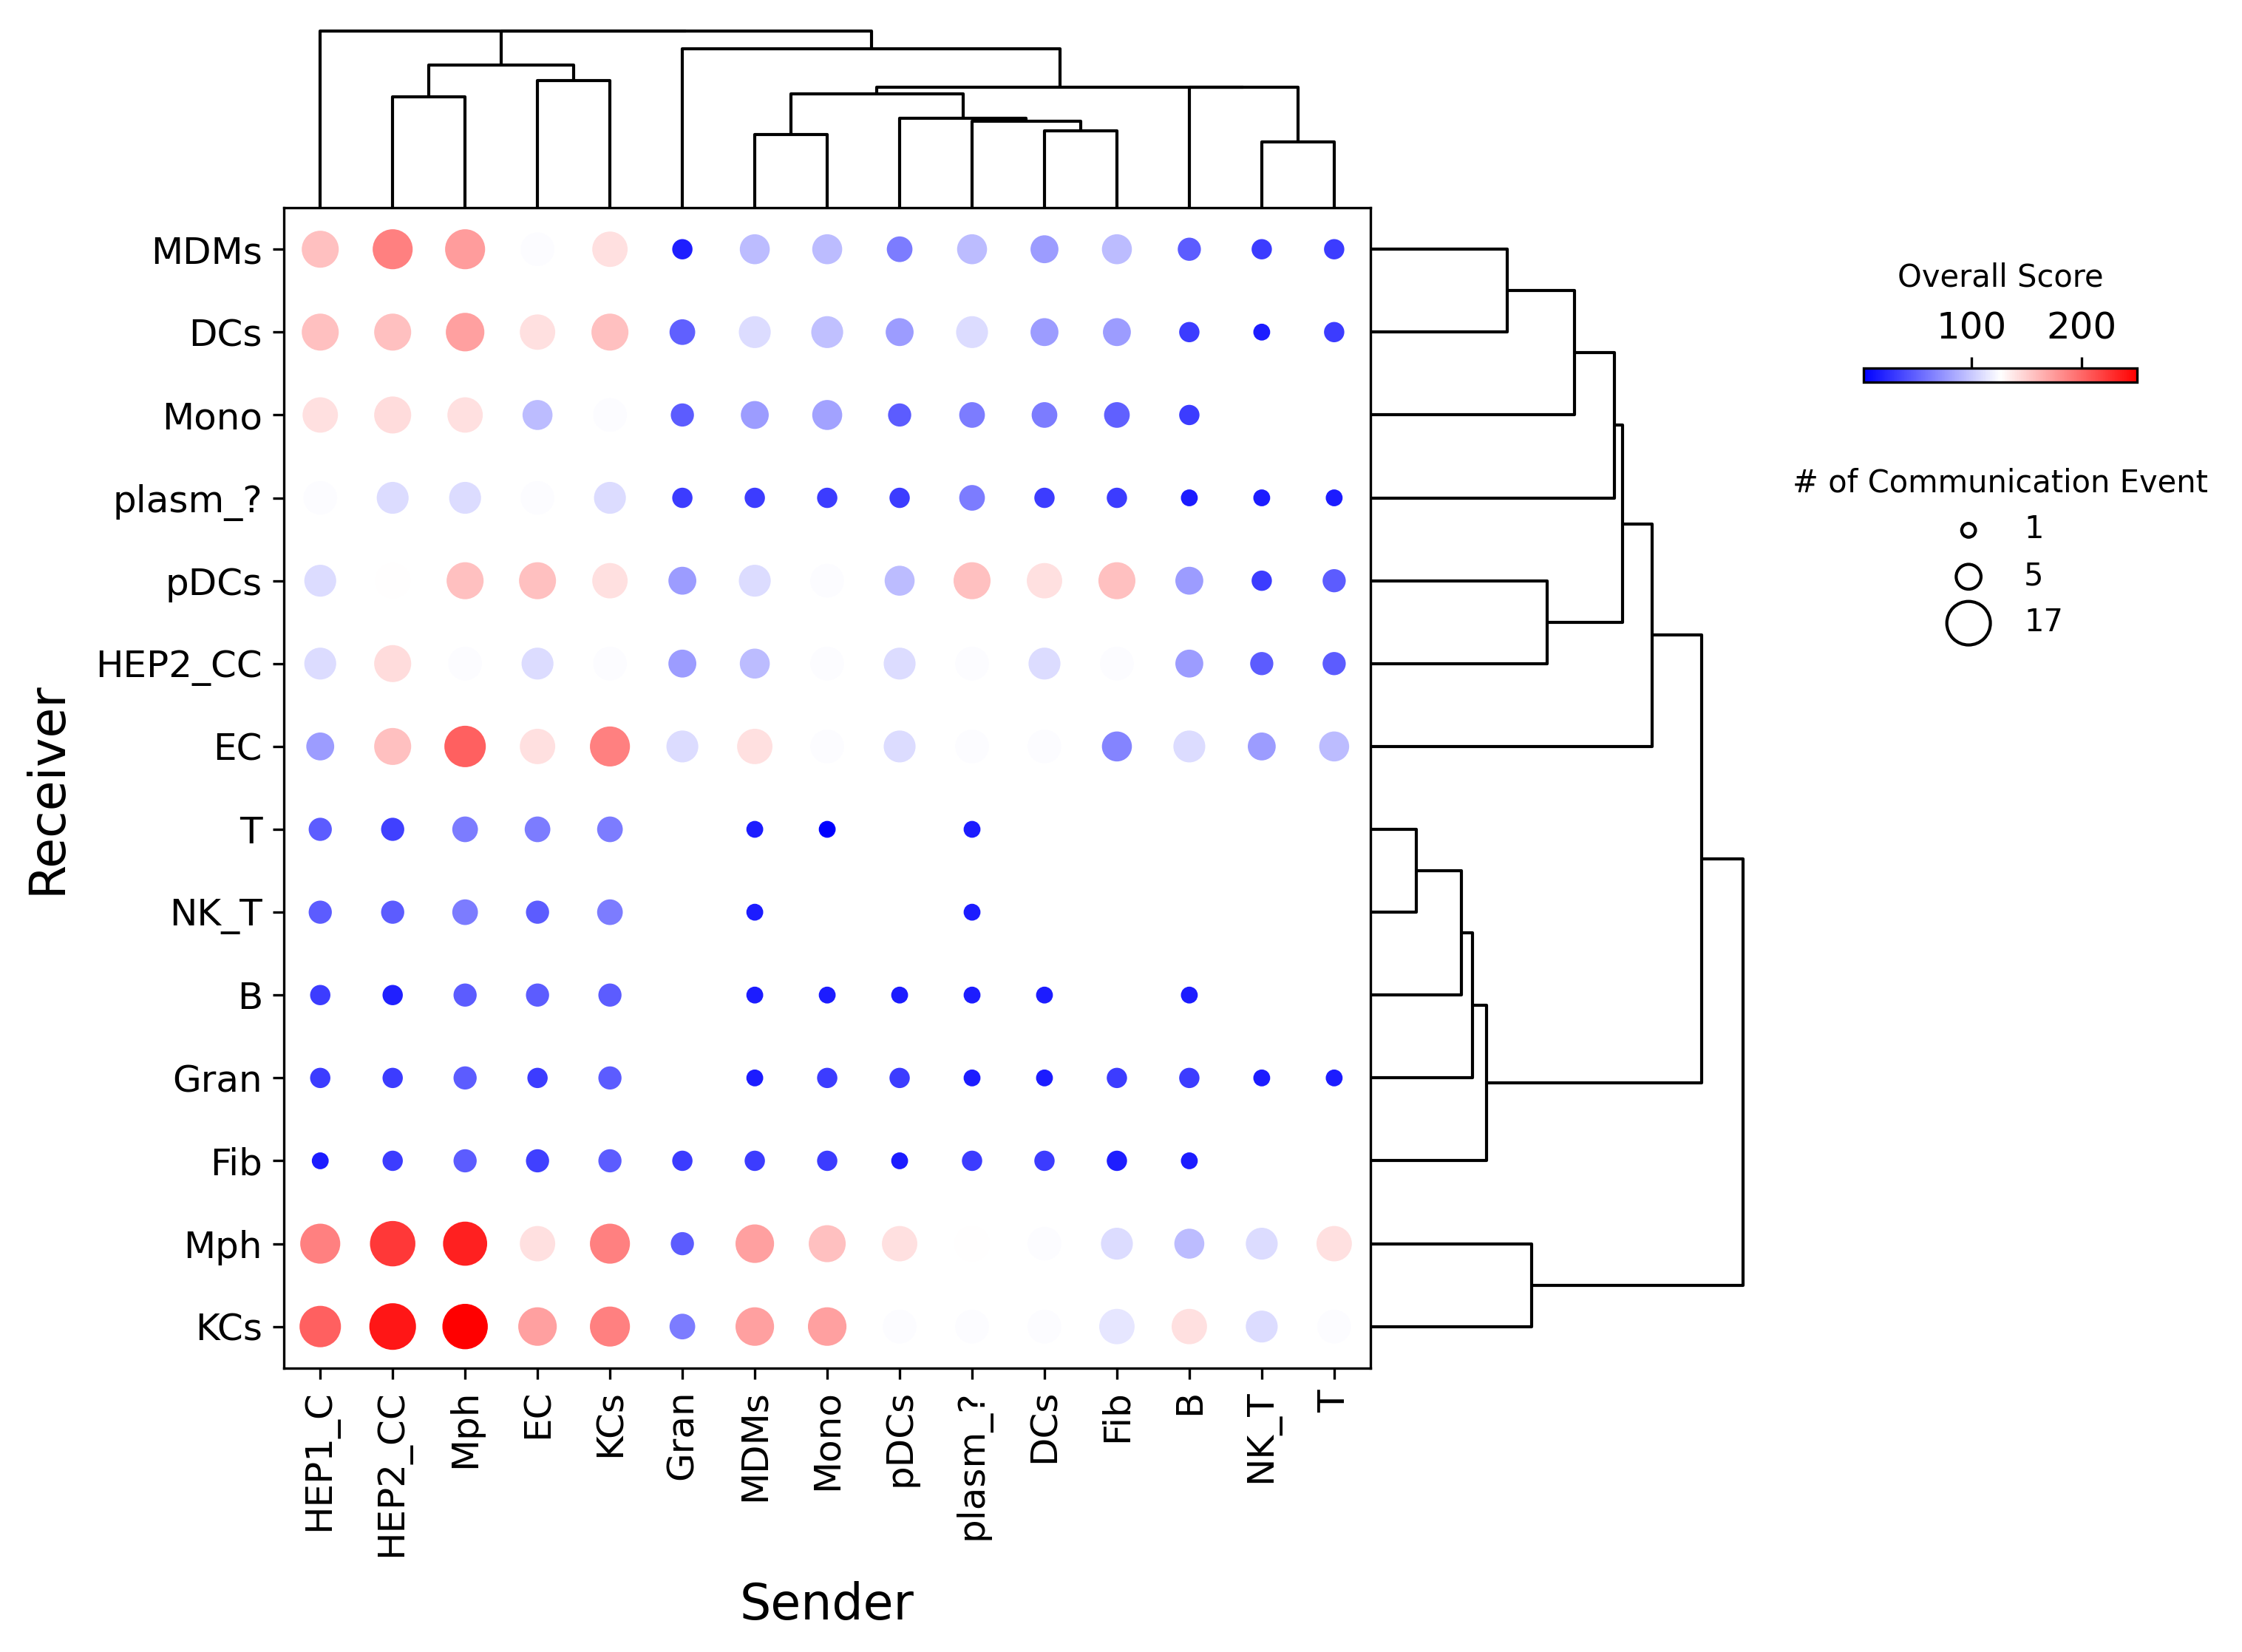

In [75]:
### dot plot to show the number of communications between cells

fig = mebo_obj.count_dot_plot(
                        pval_method='permutation_test_fdr',
                        pval_cutoff=0.05,
                        cmap='bwr',
                        figsize='auto',
                        save=True,
                        dot_size_norm =(20, 200),
                        dot_value_range = None,
                        dot_color_vmin=None,
                        dot_color_vmax=None,
                        show_plot=True,
                        comm_score_col='Commu_Score',
                        comm_score_cutoff=0,
                        dendrogram_cluster=True,
                        sender_order=[],
                        receiver_order=[],
                        return_fig = True
                    )
fig.savefig('dot_plot_rasv.pdf')

#### Showing the detailed communications (sender-receiver vs metabolite-sensor) in a dot map

In [77]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
fig = mebo_obj.commu_dotmap(
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                and_or='and',
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                figsize='auto',
                cmap='bwr',
                cmap_vmin = None,
                cmap_vmax = None,
                cellpair_order=[],
                met_sensor_order=[],
                dot_size_norm=(10, 150),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_range = None,
                comm_score_cutoff=0,
                swap_axis = False,
                return_fig = True
                )
fig.savefig('dot_map.pdf')

[June 19, 2024 20:34:33]: plot heatmap for significant result


#### Visualization of the communication flow from sender metabolite to sensor in receiver

[June 19, 2024 20:44:30]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


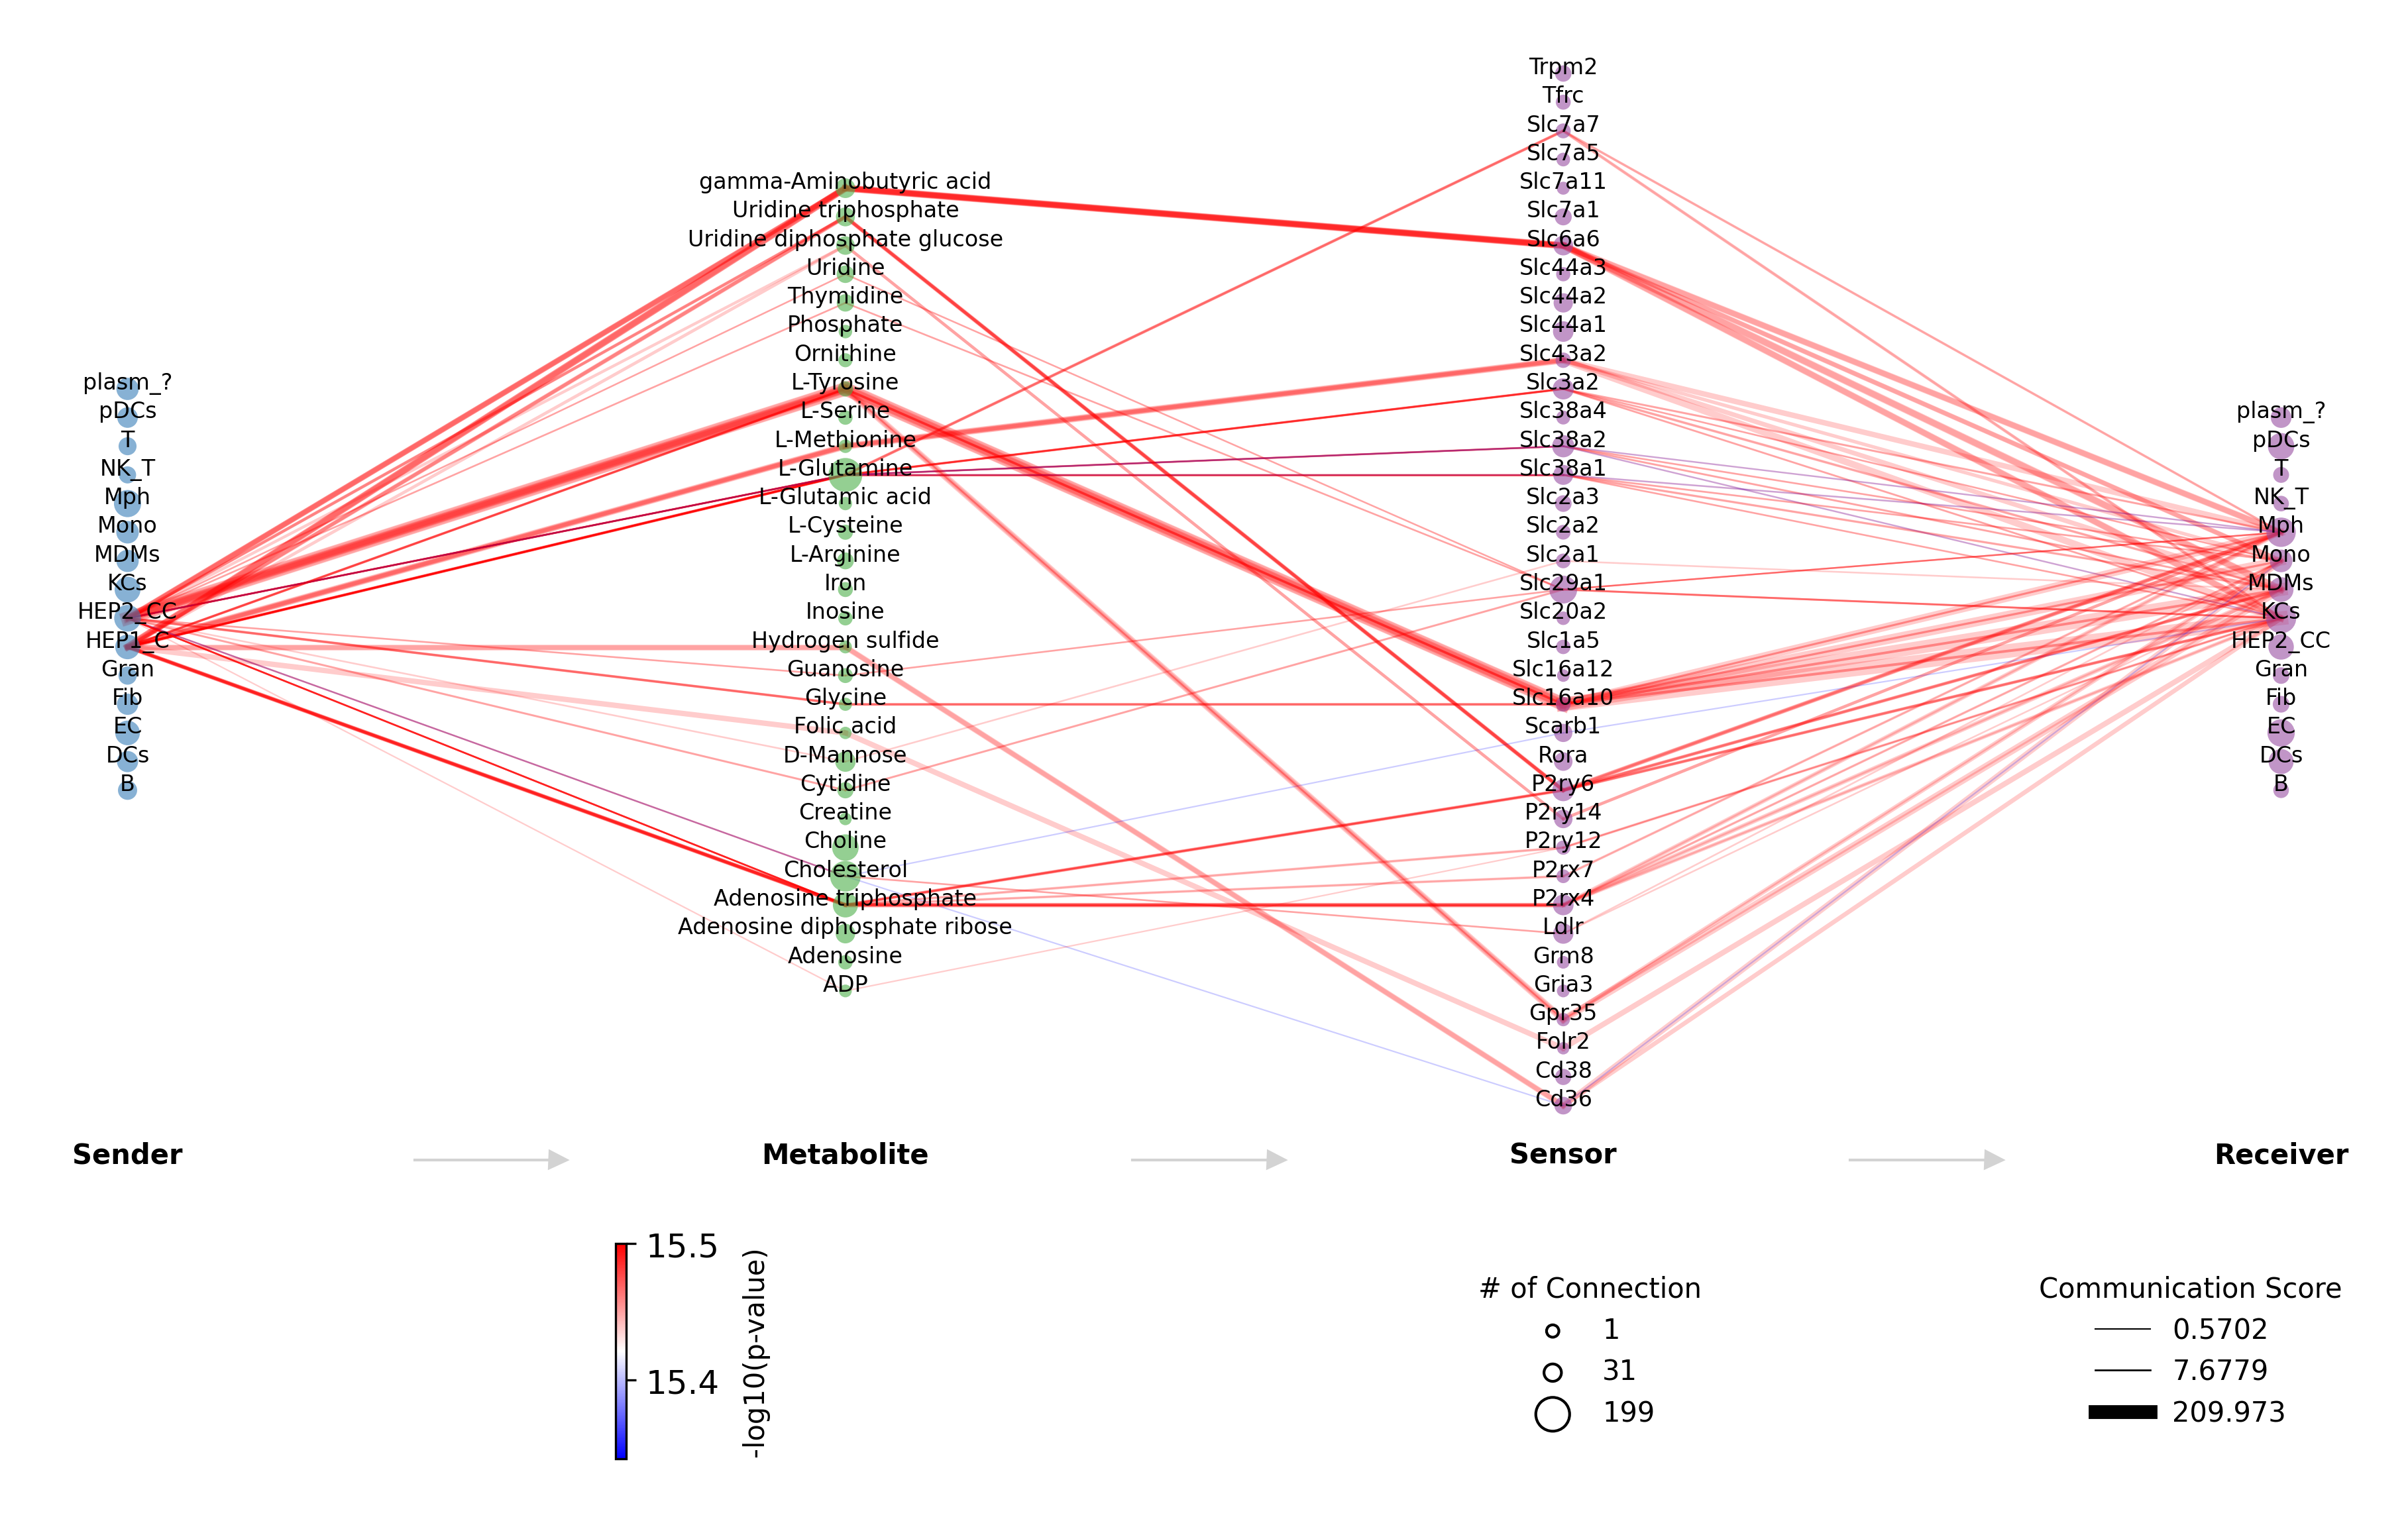

In [89]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
fig = mebo_obj.FlowPlot(
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                sender_focus=["HEP1_C", 'HEP2_CC'],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=['Mph','Mono','MDMs','KCs'],
                remove_unrelevant = False,
                and_or='and',
                node_label_size=8,
                node_alpha=0.6,
                figsize='auto',
                node_cmap='Set1',
                line_cmap='bwr',
                line_cmap_vmin = None,
                line_cmap_vmax = 15.5,
                node_size_norm=(20, 150),
                node_value_range = None,
                linewidth_norm=(0.5, 5),
                linewidth_value_range = None,
                save='test.pdf',
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                text_outline=False,
                return_fig = True
            )
fig.savefig('sender_sensor_HEP_MPH.pdf')

#### Visualization of the aggregated enzyme expression for metabolite or sensor expression in cell groups


[June 19, 2024 21:11:13]: Warnings: no sensors to plot
[June 19, 2024 21:11:13]: Find metabolites ['Cytidine', 'Uridine triphosphate', 'D-Mannose', 'Hydrogen sulfide', 'Creatine', 'Uridine', 'Phosphate', 'gamma-Aminobutyric acid', 'L-Serine', 'Thymidine', 'Choline', 'Adenosine diphosphate ribose', 'L-Methionine', 'Uridine diphosphate glucose', 'Iron', 'Glycine', 'Inosine', 'Cholesterol', 'L-Glutamine', 'Folic acid', 'Guanosine', 'L-Cysteine', 'L-Glutamic acid', 'L-Arginine', 'Adenosine', 'L-Tyrosine', 'ADP', 'Adenosine triphosphate', 'Ornithine'] to plot violin


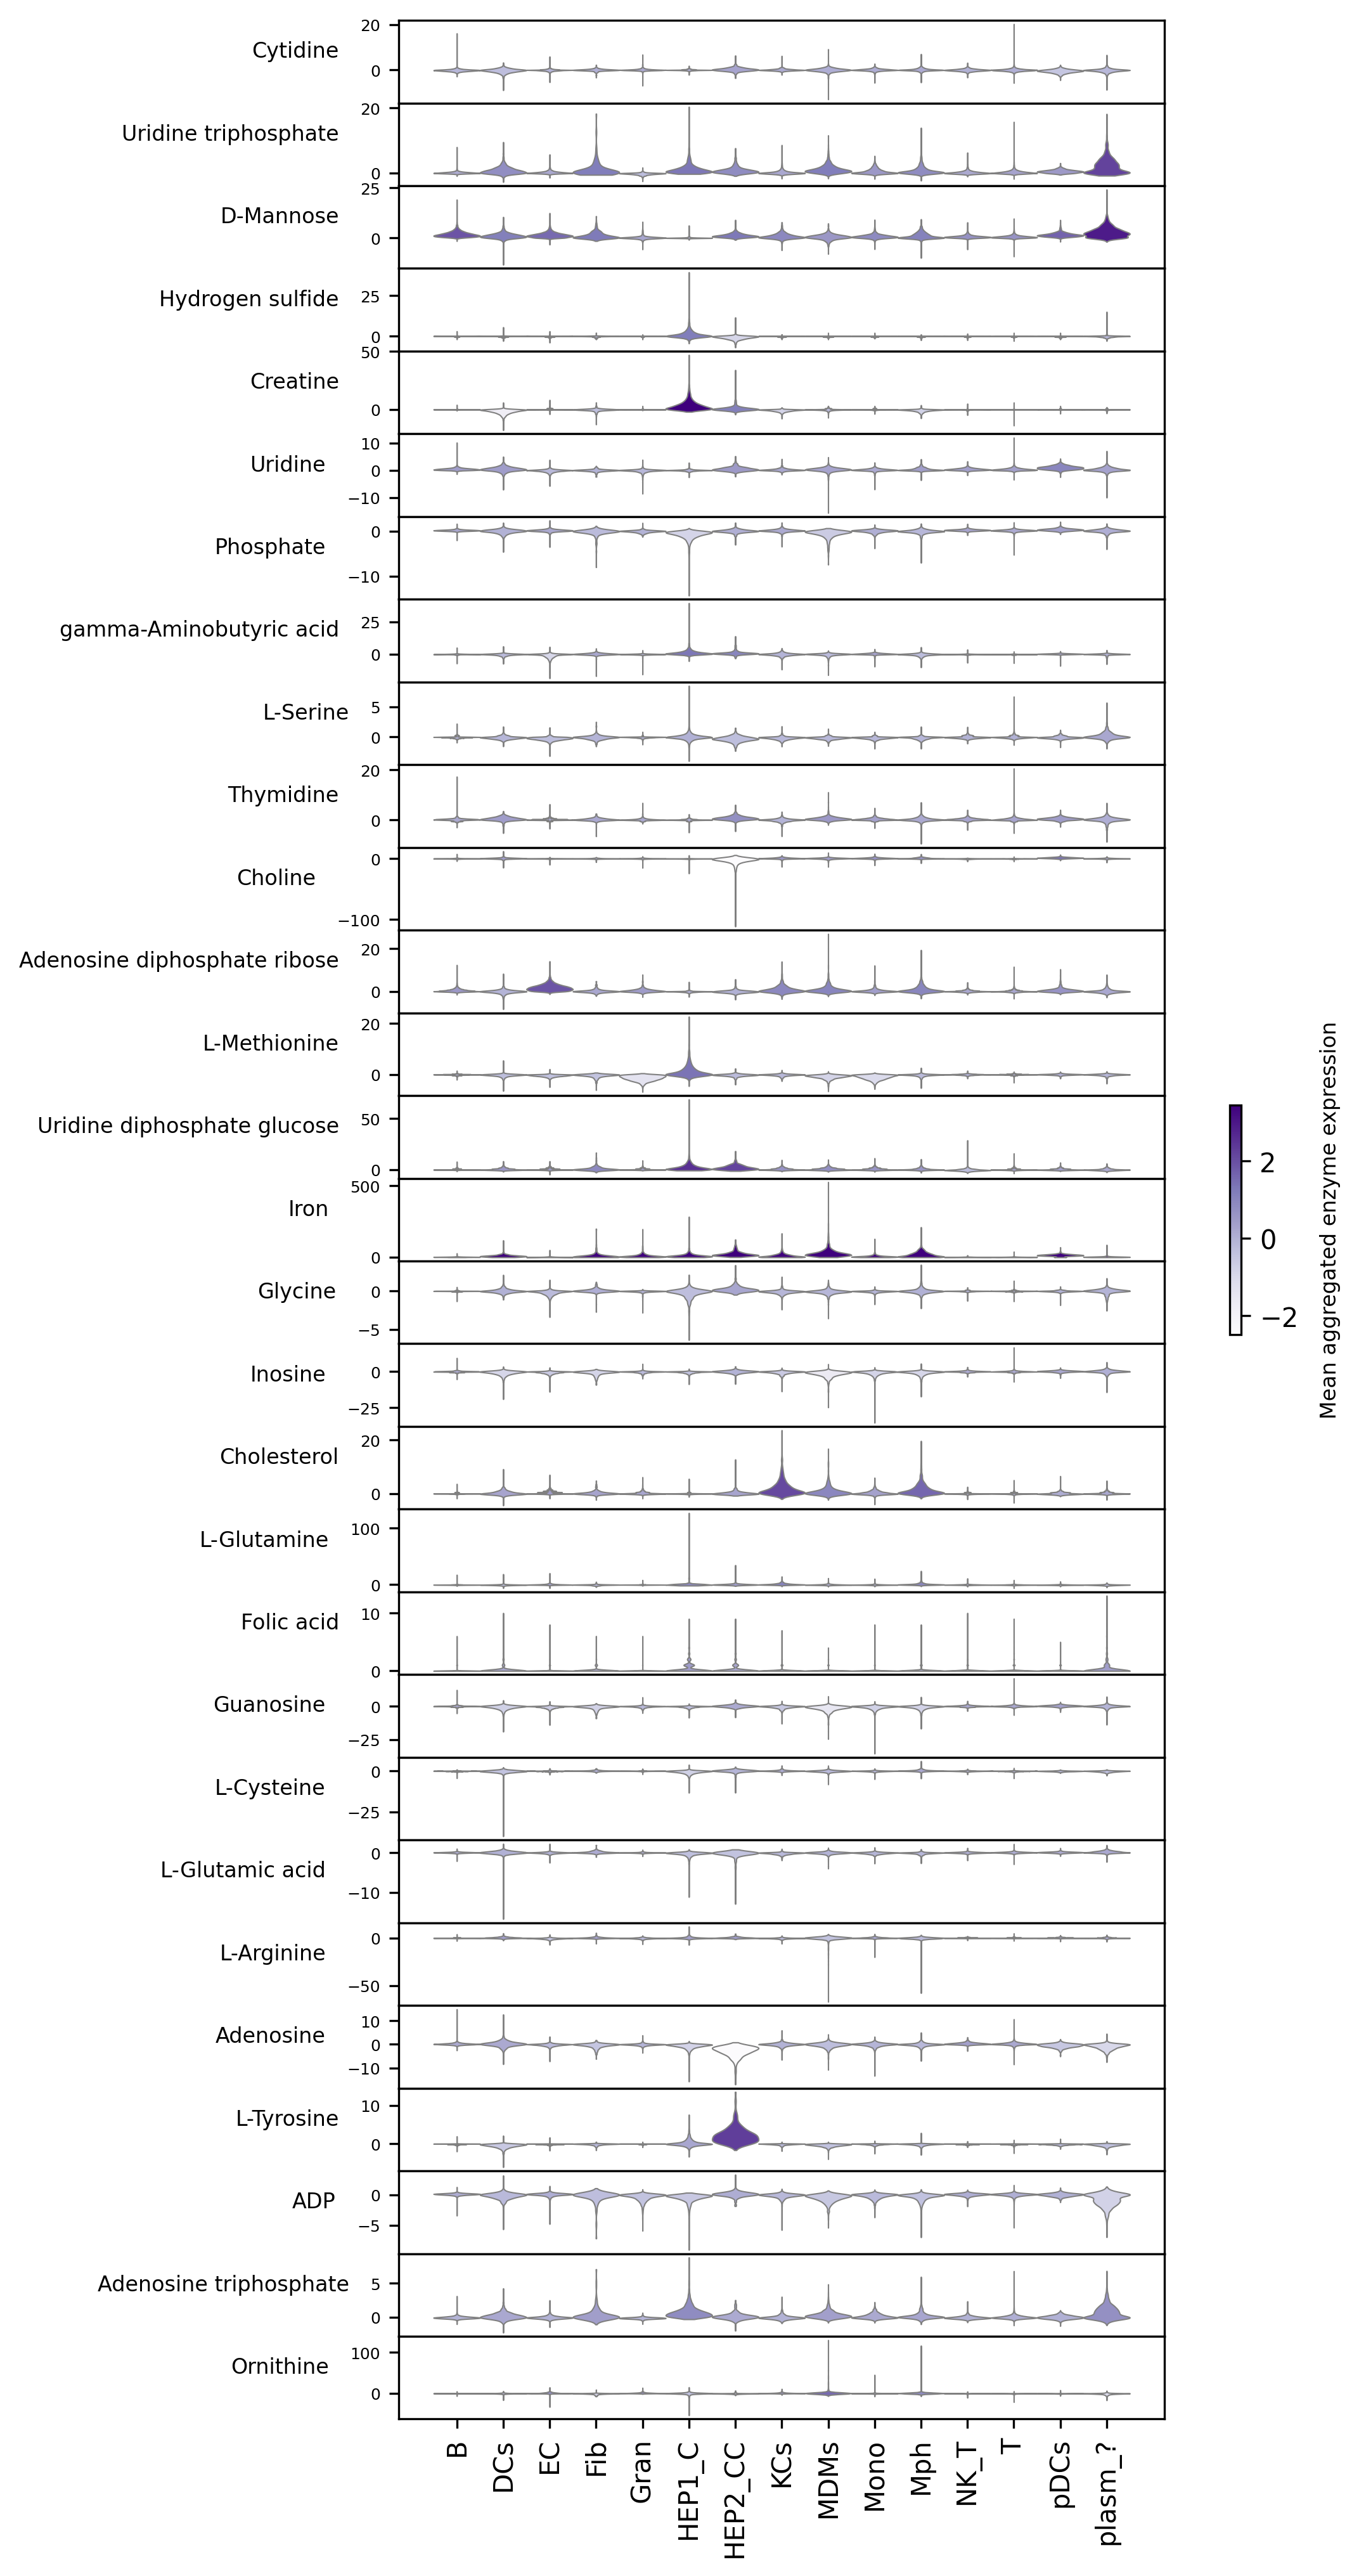

AttributeError: 'NoneType' object has no attribute 'savefig'

In [96]:
## violin plot to show the aggregated metabolite enzymes of informative metabolties in communication
### here we show five significant metabolites,
### users can pass several metabolites of interest by provide a list
commu_df = mebo_obj.commu_res.copy()
good_met = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Metabolite_Name'].sort_values().unique()

fig= mebo_obj.violin_plot(
                    sensor_or_met=good_met[:100], ## only top 5 as example
                    cell_focus=[],
                    cell_order = [],
                    row_zscore = False,
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save="enzyme.pdf",
                    show_plot=True
                    )


[June 19, 2024 21:12:05]: Find genes Index(['Gpr35', 'Slc2a2', 'Slc7a11', 'P2ry14', 'P2ry12', 'Slc44a3', 'Slc44a1',
       'Slc2a1', 'Cd36', 'Cd38', 'P2rx7', 'P2rx4', 'Scarb1', 'Slc7a1', 'Grm8',
       'Slc6a6', 'Slc2a3', 'Slc1a5', 'P2ry6', 'Folr2', 'Slc20a2', 'Slc7a5',
       'Slc44a2', 'Ldlr', 'Rora', 'Slc16a10', 'Trpm2', 'Slc43a2', 'Slc7a7',
       'Slc38a1', 'Slc38a2', 'Slc38a4', 'Tfrc', 'Slc29a1', 'Slc3a2',
       'Slc16a12', 'Gria3'],
      dtype='object') to plot violin


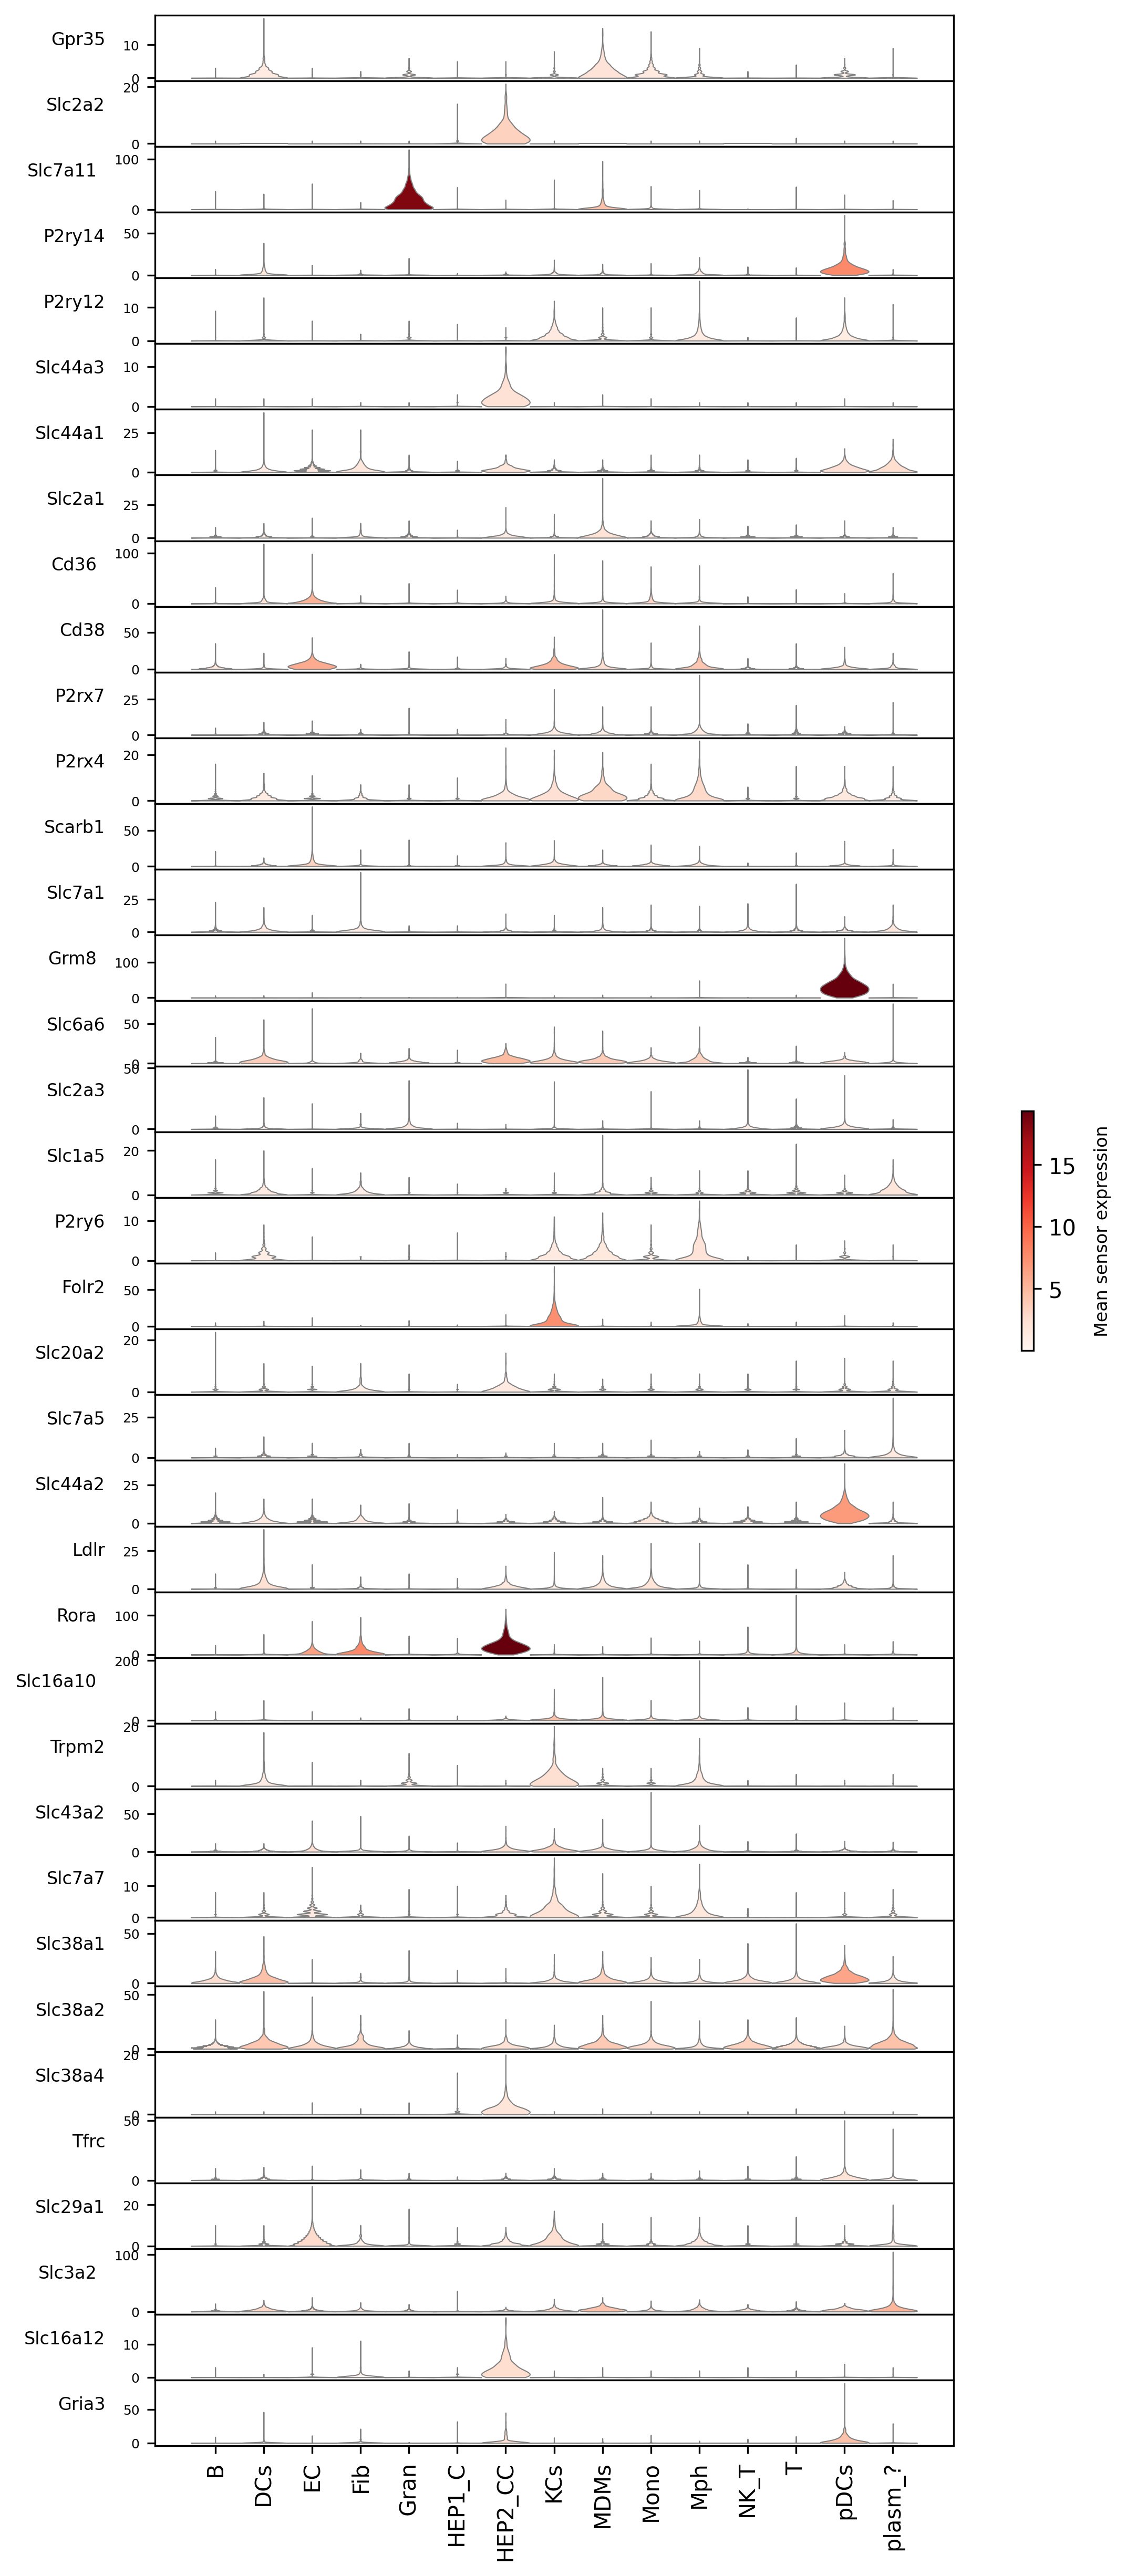

[June 19, 2024 21:12:18]: Warnings: no metabolites to plot


AttributeError: 'NoneType' object has no attribute 'savefig'

In [97]:
## violin plot to show the expression of informative sensors in communication

good_sensor = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Sensor'].sort_values().unique()

fig = mebo_obj.violin_plot(
                    sensor_or_met=good_sensor[:100],## only top 5 as example
                    cell_focus=[],
                    cell_order = [],
                    row_zscore = False,
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save='Violyn_informativesensors.pdf',
                    show_plot=True
                    )
fig.savefig('Violyn_informativesensors.pdf')

### 2.9 extract data and save figures


#### extract communication and write to a table:


In [34]:
### the updated and tidy communication result is in object, can be retreved by:
commu_res = mebo_obj.commu_res.copy()
## filter by FDR less than 0.05
commu_res = commu_res[commu_res['permutation_test_fdr']<=0.05]
## write to tsv file
commu_res.to_csv('communication_result.tsv', sep = '\t', index = None)


#### save figures
<p>Users can save figures by either providing by parameter 'save' for each plotting function, or save figure separately by hand, in this case, users need to set 'return_fig = True'</p>

###### Method 1: a example for providing filename by parameter


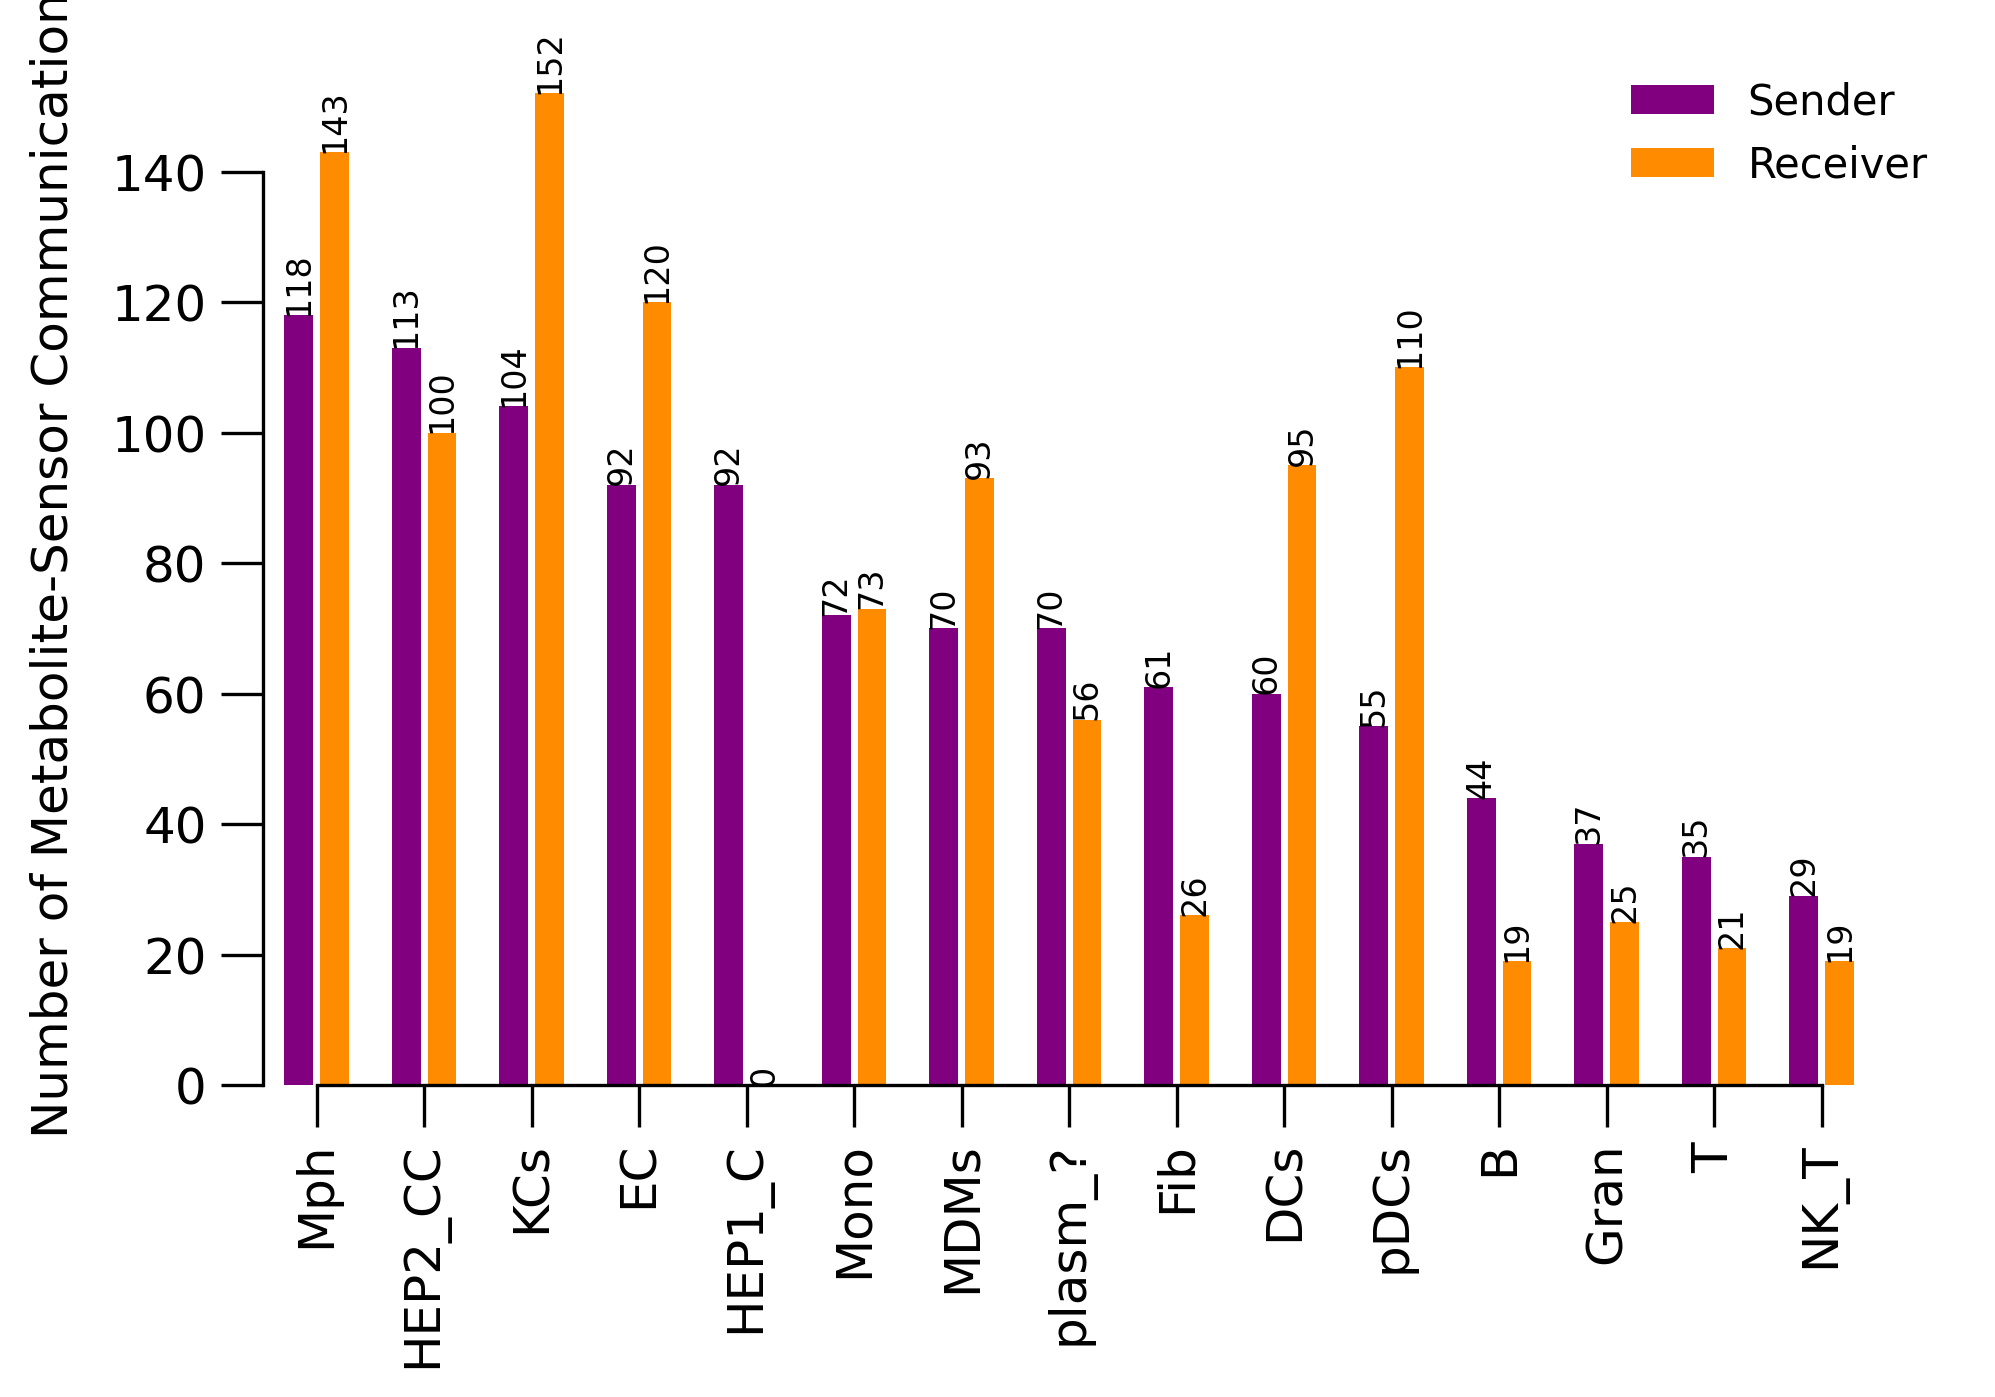

In [61]:
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    ## Note that filename passed by save parameter:
                    save='mebocost_eventnum.pdf',
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=True
                )




###### Method 2: a example for saving figures separately


In [35]:
fig = mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=True
                )
## save figure
fig.savefig('mebocost_eventnum.pdf')


#### 3 Change parameters to re-loaded object
<p>change or revise config file</p>
<p>If you changed the workspace compared to the one where you generated this object, or you want to change configure files (mebocost.conf), you may want to reset the path of the configure file, you can check the path of configure file in the current re-loaded object by:</p>

In [31]:
### If you changed the workspace compared to the one where you generated this object, 
### or you want to change configure files (mebocost.conf),
### you may want to reset the path of the configure file, 
### you can check the path of configure file in the current re-loaded object by:
print('config file path in the object:', mebo_obj.config_path)

#### if you do need to change, revise the mebocost.conf file first. 
### If done, pass the path to mebocost:

mebo_obj.config_path = './mebocost.conf'

#### then, re-load config files

mebo_obj._load_config_()


config file path in the object: ./mebocost.conf
[May 15, 2024 14:42:36]: Load config and read data based on given species [human].


#### If you want to change parameters such as cutoff of sensor expression or metabolite aggregated enzyme expression


In [34]:
# ## if users want to adjust some parameters regarding cutoff of expression 
# ## and proportion of cells expressed to focus on highly confident ones,

# ## we save the original result in variable of original_result, 
# ## so additional filtering can be done on this data frame

# ## the cutoff of sensor expression and metabolite abundance 
# ## should really dependent onusers dataset

# ## exp_prop and met_prop have been saved in the mebocost object, 
# ## you can retreve by mebo_obj.exp_prop and mebo_obj.met_prop
# ## you also can re-calculate by changing the cutoff:

exp_prop, met_prop = mebo_obj._check_aboundance_(cutoff_exp = 0.1,
                                                   cutoff_met = 0.1)


## you can pass the exp_prop and met_prop to the function and 
## filter out bad communications under the cutoff
## here is the example to use newly calculated exp_prop and met_prop
## if you want to use previously calculated in mebocost object, 
## you can replace met_prop by mebo_obj.met_prop, same for exp_prop
## cutoff_prop here means the faction of cells in the cell group expressing the senser
## or having the abundant of metabolite
commu_res_new = mebo_obj._filter_lowly_aboundant_(pvalue_res = mebo_obj.original_result.copy(),
                                                    cutoff_prop = 0.25,
                                                    met_prop=met_prop,
                                                    exp_prop=exp_prop,
                                                    min_cell_number = 1
                                                 )

## update your commu_res in mebocost object, 
## so that the object can used to generate figure based on the updated data
mebo_obj.commu_res = commu_res_new.query('permutation_test_fdr < 0.05').copy()

# ## change such parameters to narrow down to highly confident communications if you got a big number of communications in your data 


## constrain by eflux and influx if you have COMPASS result
updated_res = mebo_obj._ConstainFlux_(compass_folder='data/demo/compass_res/',
                                    efflux_cut='auto',
                                    influx_cut='auto',
                                    inplace=False)
mebo_obj.commu_res = updated_res.copy()
print('Number of mCCC detected by the new parameters: %s'%mebo_obj.commu_res.shape[0])


[May 15, 2024 14:44:05]: Calculating metabolite aggregated enzyme and sensor expression in cell groups
[May 15, 2024 14:44:05]: cutoff for sensor expression, cutoff=0.1
[May 15, 2024 14:44:05]: cutoff for metabolite aggregated enzyme, cutoff=0.1
[May 15, 2024 14:44:05]: cutoff_exp: 0.1
[May 15, 2024 14:44:06]: cutoff_metabolite: 0.1
[May 15, 2024 14:44:07]: Set p value and fdr to 1 if sensor or metaboltie expressed cell proportion less than 0.25
efflux_cut: 10.105265015312568
influx_cut: 2.352030916167703
Number of mCCC detected by the new parameters: 145


# Checking cci Per condition !!!!!!!!!!!!!!!!

In [ ]:
#for example
#adata.obs['label'] = adata.obs['cell_type'] + '~' + adata.obs['condition']
#run mebocost by giving "label" as cell group column
#cellall_mebo is the object of mebocost result
mebo_obj = mebocost.create_obj(
                       adata = adata,
                        group_col = ['label'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='mouse',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 5,
                                pval_method='permutation_test_fdr',
                                pval_cutoff=0.05
                            )


print('Number of mCCC detected by enzyme and sensor co-expression: ', commu_res.shape[0])


[June 20, 2024 00:48:50]: We get expression data with 24461 genes and 73268 cells.
[June 20, 2024 00:48:50]: Data Preparation Done in 0.1864 seconds
[June 20, 2024 00:48:50]: Load config and read data based on given species [mouse].
[June 20, 2024 00:48:52]: Aggregate metabolite enzymes using mebocost
[June 20, 2024 00:49:13]: Infer communications
[June 20, 2024 00:49:13]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[June 20, 2024 00:49:13]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[June 20, 2024 00:50:32]: met_sensor: (323, 8)
[June 20, 2024 00:50:32]: avg_exp: (2145, 45) for (gene, cell) of needed
[June 20, 2024 00:50:32]: avg_met: (586, 45) for (metabolite, cell) of needed
[June 20, 2024 00:50:32]: shuffling 1000 times for generating backgroud
[June 20, 2024 00:51:42]: take exp and met avg for shuffling
[June 20, 2024 00:53:26]: thread: 8
[June 20, 2024 00:53:29]: Abca1 ~ HMDB0006247
[June 20, 2024 00:53:29]: Normalizing Cluster Mean an

In [ ]:
avg_exp = sc.get.aggregate(adata, by = 'label', func='mean')
avg_exp = pd.DataFrame(avg_exp.layers['mean'], index = avg_exp.obs_names, columns = avg_exp.var_names).T
# ## do un log since COMPASS will take log in the algorithm
avg_exp = avg_exp.apply(lambda col: np.exp(col)-1)
avg_exp.to_csv('avg_exp_mat_conditions.tsv', sep = '\t')

In [ ]:
## apply constraint on compass flux result
updated_res = mebo_obj._ConstainFlux_(compass_folder='compass_res/',
                                    efflux_cut='auto',
                                    influx_cut='auto',
                                    inplace=False)

In [ ]:
mebo_obj.commu_res = updated_res
print('Number of mCCC detected by further flux contrains', updated_res.shape[0])
mebocost.save_obj(obj = mebo_obj, path = 'rasV_mebo_conditions.pk')

In [ ]:
cellall_mebo = mebocost.load_obj(path = './rasV_mebo_conditions.pk') 

#focus on communications in same condition
commu_res = cellall_mebo.commu_res.copy()

#you can modify this chunk of code based on your data, here I write this as my cell group labeled as celltype~condition, keep it if it's same

commu_res['sender_cond'] = [x.split("~")[-1] for x in commu_res['Sender'].tolist()]
commu_res['receiver_cond'] = [x.split("~")[-1] for x in commu_res['Receiver'].tolist()]
commu_res_new = pd.DataFrame()
for c in commu_res['sender_cond'].unique().tolist():
    tmp = commu_res[(commu_res['sender_cond'] == c) & (commu_res['receiver_cond'] == c)]
    commu_res_new = pd.concat([commu_res_new, tmp])

cellall_mebo.commu_res = commu_res_new.copy()

In [91]:
#find significant communication in at least one condition
commu_res_new['label'] = commu_res_new['Sender'].apply(lambda x: x.split('~')[0])+'~'+commu_res_new['Metabolite_Name']+'~'+commu_res_new['Sensor']+'~'+commu_res_new['Receiver'].apply(lambda x: x.split('~')[0])
significant = commu_res_new[commu_res_new['permutation_test_fdr'] < 0.05]
significant
commu_res_need = commu_res_new[commu_res_new['label'].isin(significant['label'])]

commu_res_need_mat = commu_res_need.pivot_table(index = 'label', columns = 'sender_cond', values = 'Commu_Score')
#Index of dispersion
IOD = commu_res_need_mat.apply(lambda row: np.var(row)/np.mean(row), axis = 1).sort_values(ascending=False)
#select top 100 based on IOD
top_n = 100
most_var_commu = commu_res_need_mat.loc[IOD.head(top_n).index]
most_var_commu = pd.concat([most_var_commu,
                            pd.DataFrame(most_var_commu.index.str.split('~').tolist(),
                                         index = most_var_commu.index, 
                                         columns = ['Sender', 'Met', 'Sensor', 'Receiver'])],
                          axis = 1)
#then you can plot by this data frame: most_var_commu

NameError: name 'commu_res_new' is not defined

In [ ]:
cellall_mebo.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    xorder=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=True,
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )

In [ ]:
## here, users can click and plot figures

## interactive view module mimic a website but all go with our default parameters
cellall_mebo.communication_in_notebook(pval_method='permutation_test_fdr',
                                    pval_cutoff=0.05,
                                    comm_score_col='Commu_Score',
                                    comm_score_cutoff=None,
                                    cutoff_prop=None)